# **Load Data and Exploration**

In [1]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reads in a CSV file
data = pd.read_csv('animal_disease_dataset.csv')

In [3]:
data.shape

(43778, 7)

In [4]:
#Display the first 10 rows of the dataset
data.head(5)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,sheep,1,100.5,depression,painless lumps,loss of appetite,lumpy virus
3,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
4,sheep,2,103.6,painless lumps,loss of appetite,depression,pneumonia


In [5]:
#Display the last 10 rows of the dataset
data.tail(5)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
43773,goat,9,102.2,swelling in muscle,lameness,crackling sound,blackleg
43774,buffalo,3,101.8,loss of appetite,sores on mouth,difficulty walking,foot and mouth
43775,buffalo,15,104.1,swelling in extremities,chills,shortness of breath,anthrax
43776,cow,9,104.9,crackling sound,lameness,swelling in muscle,blackleg
43777,buffalo,4,103.5,difficulty walking,sores on gums,loss of appetite,foot and mouth


In [6]:
# selects a random sample of 5 rows
data.sample(5)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
26841,goat,10,100.9,swelling in limb,depression,crackling sound,blackleg
15876,sheep,3,100.0,loss of appetite,difficulty walking,blisters on gums,foot and mouth
28277,buffalo,9,101.9,loss of appetite,depression,painless lumps,pneumonia
39058,sheep,3,102.7,loss of appetite,swelling in limb,difficulty walking,blackleg
23888,goat,4,103.8,loss of appetite,sores on tongue,lameness,foot and mouth


In [7]:
#Display the column names
data.columns

Index(['Animal', 'Age', 'Temperature', 'Symptom 1', 'Symptom 2', 'Symptom 3',
       'Disease'],
      dtype='object')

In [8]:
#Check the data types of each column
data.dtypes

Animal          object
Age              int64
Temperature    float64
Symptom 1       object
Symptom 2       object
Symptom 3       object
Disease         object
dtype: object

In [9]:
# Generate a statistical summary of a dataset
data.describe()

,Age,Temperature
count,43778.000000,43778.000000
mean,6.769131,102.269590
std,3.886739,1.400872
min,1.000000,100.000000
25%,4.000000,101.100000
50%,7.000000,102.200000
75%,10.000000,103.400000
max,15.000000,105.000000


# **Data Preprocessing**

# **Check For Missing Values**:



In [10]:
#Check for the presence of any missing values in the entire dataset
data.isnull().any().any()

False

**it means there are no missing values in the entire dataset.**

In [11]:
#Check for null values in each column
data.isnull().sum()

Animal         0
Age            0
Temperature    0
Symptom 1      0
Symptom 2      0
Symptom 3      0
Disease        0
dtype: int64

# **Duplicate Rows**:

In [12]:
#Identify duplicates
data.duplicated().sum()

0

**There are no duplicate rows in the dataset.**

# **Checking For Potential Outliers:**

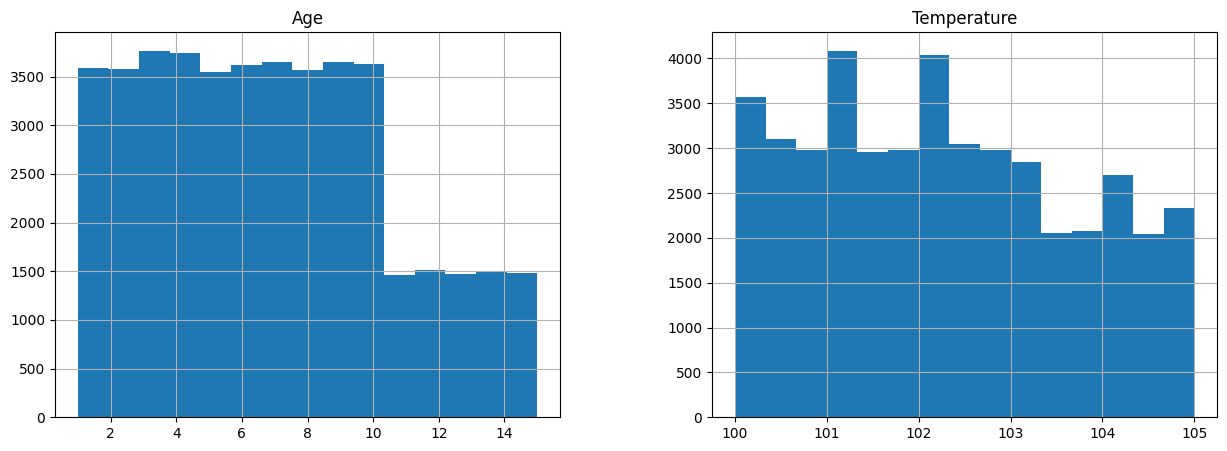

In [13]:
# Histograms to visualize the distribution of each feature to identify potential outliers
data.hist(figsize=(15, 5), bins=15)
plt.show()

**It appears that the histograms indicate no significant outliers, suggesting we don't need to be overly concerned about outliers in this dataset.**

**The dataset is clean, with no missing values or duplicate entries.No potential outliers as well.**

# **EDA (Phase 1)**

In [14]:
#randomly selects 5 rows from the categorical or text data from the dataset
data.select_dtypes(include= 'object').sample(5)

,Animal,Symptom 1,Symptom 2,Symptom 3,Disease
28082,cow,painless lumps,depression,loss of appetite,lumpy virus
43045,cow,difficulty walking,blisters on mouth,loss of appetite,foot and mouth
35632,goat,loss of appetite,depression,painless lumps,pneumonia
39085,cow,blisters on mouth,loss of appetite,lameness,foot and mouth
31111,goat,fatigue,shortness of breath,chest discomfort,anthrax


In [15]:
#The summary includes count (number of non-null values), unique (number of unique values),top (most frequent value), and freq (frequency of the most frequent value) for each categorical column.
data.describe(include = 'object')

,Animal,Symptom 1,Symptom 2,Symptom 3,Disease
count,43778,43778,43778,43778,43778
unique,4,24,24,24,5
top,cow,loss of appetite,loss of appetite,loss of appetite,anthrax
freq,11254,10026,10068,10004,9842


**Identifying Unique Values in Each Column**

**Animal Column**

In [16]:
unique_values = data['Animal'].unique()
# Displaying the unique values
print("Unique Values in 'Animal' column:", unique_values)

Unique Values in 'Animal' column: ['cow' 'buffalo' 'sheep' 'goat']


**Symptom 1 Column**

In [17]:
unique_values = data['Symptom 1'].unique()
# Displaying the unique values
print("Unique Values in 'Symptom 1' column:", unique_values)

Unique Values in 'Symptom 1' column: ['depression' 'painless lumps' 'loss of appetite' 'difficulty walking'
 'lameness' 'chills' 'crackling sound' 'sores on gums' 'fatigue'
 'shortness of breath' 'chest discomfort' 'swelling in limb'
 'swelling in abdomen' 'blisters on gums' 'swelling in extremities'
 'swelling in muscle' 'blisters on hooves' 'blisters on tongue'
 'sores on tongue' 'sweats' 'sores on hooves' 'blisters on mouth'
 'swelling in neck' 'sores on mouth']


**Symptom 2 Column**

In [18]:
unique_values = data['Symptom 2'].unique()
# Displaying the unique values
print("Unique Values in 'Symptom 2' column:", unique_values)

Unique Values in 'Symptom 2' column: ['painless lumps' 'loss of appetite' 'swelling in limb' 'blisters on gums'
 'depression' 'blisters on tongue' 'blisters on mouth'
 'swelling in extremities' 'sores on mouth' 'lameness' 'sores on tongue'
 'difficulty walking' 'sweats' 'sores on hooves' 'shortness of breath'
 'crackling sound' 'chest discomfort' 'chills' 'swelling in abdomen'
 'sores on gums' 'swelling in muscle' 'fatigue' 'swelling in neck'
 'blisters on hooves']


**Symptom 3 Column**

In [19]:
unique_values = data['Symptom 3'].unique()
# Displaying the unique values
print("Unique Values in 'Symptom 3' column:", unique_values)

Unique Values in 'Symptom 3' column: ['loss of appetite' 'depression' 'crackling sound' 'difficulty walking'
 'painless lumps' 'shortness of breath' 'lameness' 'chills'
 'swelling in extremities' 'fatigue' 'chest discomfort' 'swelling in limb'
 'sweats' 'blisters on mouth' 'sores on mouth' 'swelling in abdomen'
 'blisters on tongue' 'swelling in muscle' 'swelling in neck'
 'sores on tongue' 'blisters on hooves' 'blisters on gums'
 'sores on hooves' 'sores on gums']


**Disease Column(Target Column)**

In [20]:
unique_values = data['Disease'].unique()
# Displaying the unique values
print("Unique Values in 'Disease' column:", unique_values)

Unique Values in 'Disease' column: ['pneumonia' 'lumpy virus' 'blackleg' 'foot and mouth' 'anthrax']


# **Feature Selection Phase 1 : Domain KNowledge Based Selection**

**It seems that all features in the dataset are important for the target variable. However, based on domain knowledge, we choose not to remove any features. Nonetheless, we will exclude sheep from the 'animal' column as it is irrelevant to our scope.**

In [21]:
animals_to_remove = ["sheep"]

In [22]:
#remove sheep from the dataset
data = data[~data['Animal'].isin(animals_to_remove)].reset_index(drop=True)

In [23]:
#The summary includes count (number of non-null values), unique (number of unique values),top (most frequent value), and freq (frequency of the most frequent value) for each categorical column.
data.describe(include = 'object')

,Animal,Symptom 1,Symptom 2,Symptom 3,Disease
count,33120,33120,33120,33120,33120
unique,3,24,24,24,5
top,cow,loss of appetite,loss of appetite,loss of appetite,anthrax
freq,11254,7607,7629,7643,7355


In [24]:
data.head(5)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
0,cow,3,103.1,depression,painless lumps,loss of appetite,pneumonia
1,buffalo,13,104.5,painless lumps,loss of appetite,depression,lumpy virus
2,cow,14,100.3,loss of appetite,swelling in limb,crackling sound,blackleg
3,goat,10,101.2,loss of appetite,blisters on gums,difficulty walking,foot and mouth
4,goat,6,101.7,difficulty walking,blisters on tongue,loss of appetite,foot and mouth


In [25]:
data.tail(5)

,Animal,Age,Temperature,Symptom 1,Symptom 2,Symptom 3,Disease
33115,goat,9,102.2,swelling in muscle,lameness,crackling sound,blackleg
33116,buffalo,3,101.8,loss of appetite,sores on mouth,difficulty walking,foot and mouth
33117,buffalo,15,104.1,swelling in extremities,chills,shortness of breath,anthrax
33118,cow,9,104.9,crackling sound,lameness,swelling in muscle,blackleg
33119,buffalo,4,103.5,difficulty walking,sores on gums,loss of appetite,foot and mouth


In [26]:
data.shape

(33120, 7)

# **EDA(Phase 2)**

# **Categorical Feature Analysis**

***Animal Column***

In [27]:
# retrieves the count of unique values in the 'Fish Diseases' column
data['Animal'].value_counts()

cow        11254
buffalo    11238
goat       10628
Name: Animal, dtype: int64

<ipython-input-28-1c4d188dee63>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Animal', data=data, palette=colors.values(), order=['cow', 'buffalo', 'goat'], ax=axs[1])


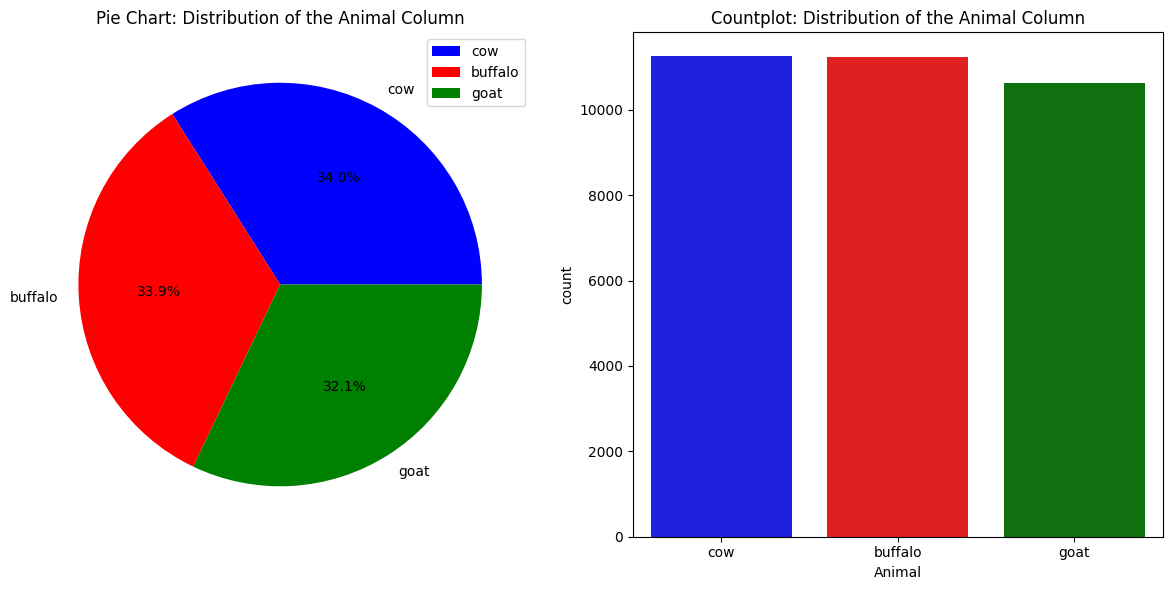

In [28]:
# Define the colors
colors = {'cow': 'blue', 'buffalo': 'red', 'goat': 'green'}

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart
axs[0].pie(data['Animal'].value_counts(), autopct="%1.1f%%", labels=['cow', 'buffalo', 'goat'], colors=[colors[x] for x in ['cow', 'buffalo', 'goat']])
axs[0].legend()
axs[0].set_title('Pie Chart: Distribution of the Animal Column')

# Countplot with the specified color palette
sns.countplot(x='Animal', data=data, palette=colors.values(), order=['cow', 'buffalo', 'goat'], ax=axs[1])
axs[1].set_title('Countplot: Distribution of the Animal Column')

plt.tight_layout()
plt.show()

***Symptom Columns***

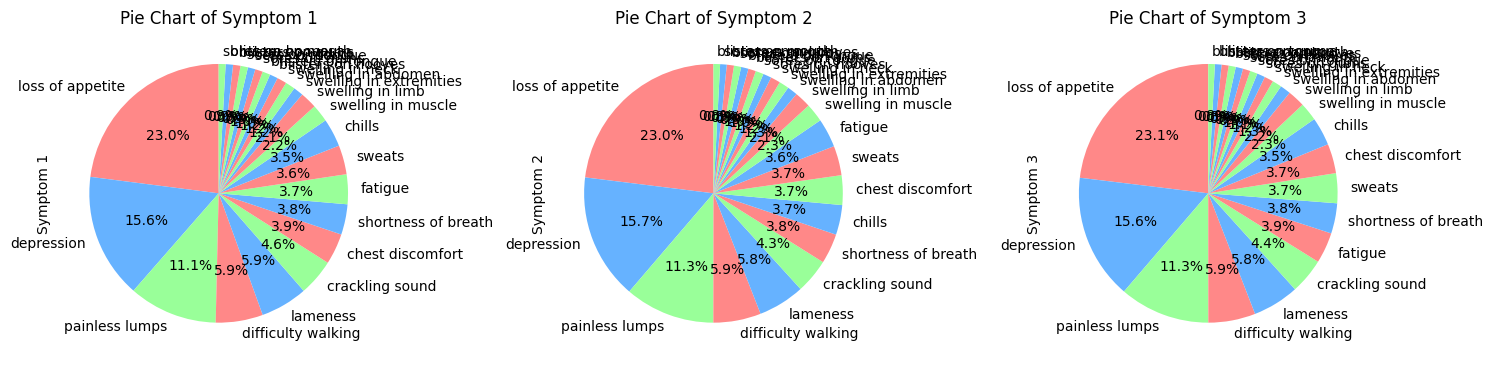

In [29]:
# Categorical features to visualize
categorical_features = ['Symptom 1', 'Symptom 2', 'Symptom 3']

# Set a different color palette
colors = ['#FF8888', '#66B2FF', '#99FF99']  # You can customize the colors

# Create pie charts for each categorical feature with a different color palette
plt.figure(figsize=(15, 5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, 3, i+1)
    data[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=colors)
    plt.title(f'Pie Chart of {feature}')

plt.tight_layout()
plt.show()

# **Disease Column(Target Column)**

In [30]:
# retrieves the count of unique values in the 'Fish Diseases' column
data['Disease'].value_counts()

anthrax           7355
blackleg          7317
foot and mouth    7309
pneumonia         5619
lumpy virus       5520
Name: Disease, dtype: int64

<ipython-input-31-8487e6377b88>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Disease', data=data, palette='pastel')


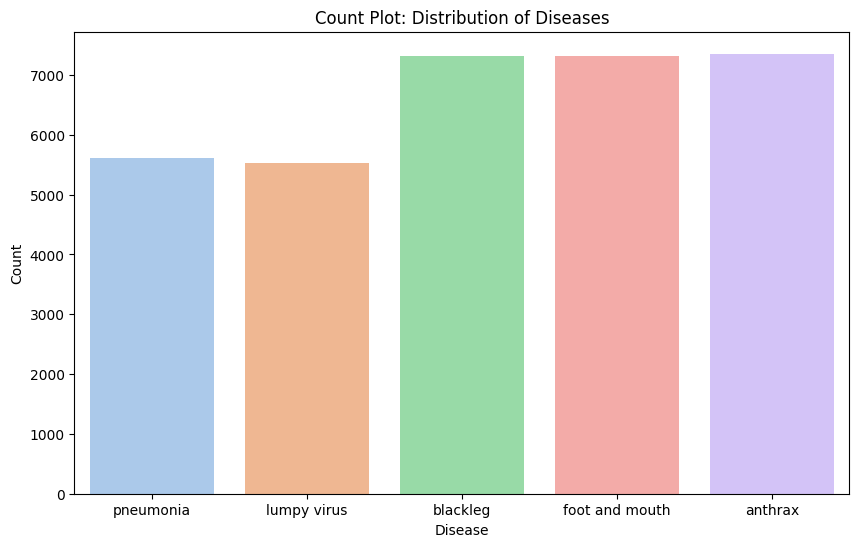

In [31]:
import seaborn as sns

# Count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Disease', data=data, palette='pastel')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.title('Count Plot: Distribution of Diseases')
plt.show()

# **Numerical Feature Analysis**

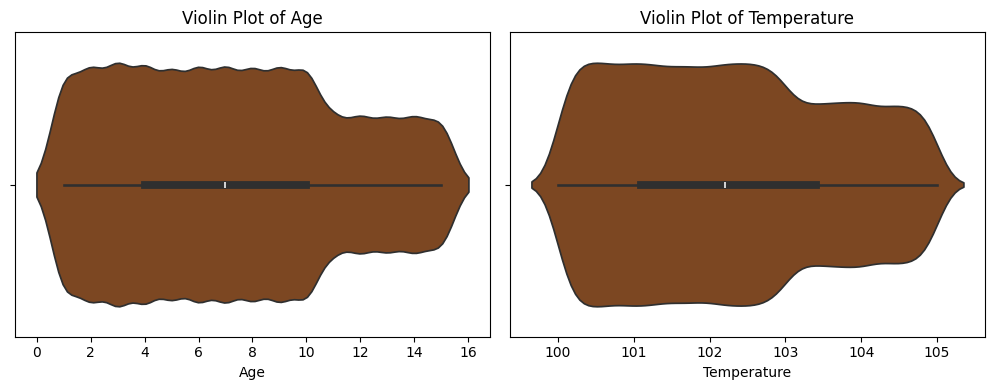

In [32]:
# Features to visualize
features = ['Age', 'Temperature']

# Set color to brown
brown_color = '#8B4513'  # Hex color for brown

# Create violin plots for each feature with brown color
plt.figure(figsize=(15, 4))
for i, feature in enumerate(features):
    plt.subplot(1, 3, i+1)
    sns.violinplot(x=data[feature], color=brown_color)
    plt.title(f'Violin Plot of {feature}')

plt.tight_layout()
plt.show()

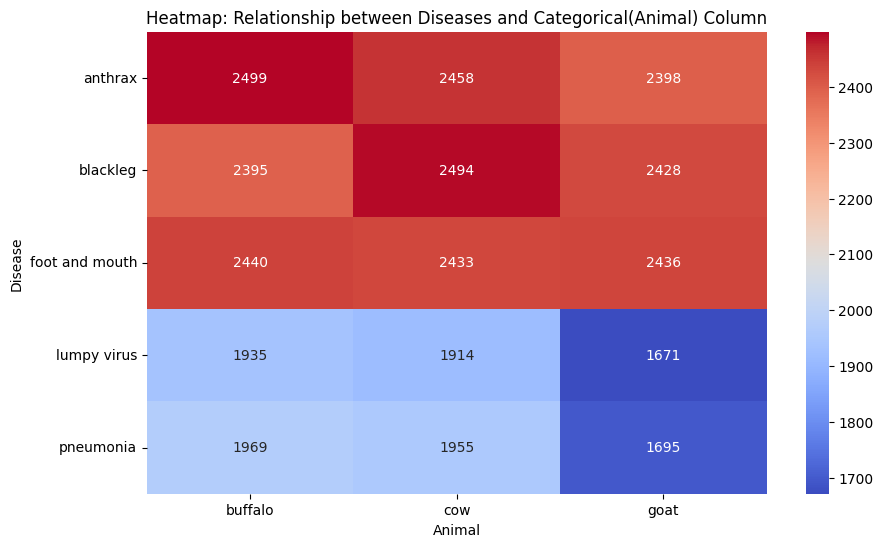

In [33]:
# Heatmap
heatmap_data = data.pivot_table(index='Disease', columns='Animal', aggfunc='size')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='d')
plt.xlabel('Animal')
plt.ylabel('Disease')
plt.title('Heatmap: Relationship between Diseases and Categorical(Animal) Column')
plt.show()

# **One Hot Encoding**

# **Y**

In [34]:
# Perform one-hot encoding without dropping any columns
data_encoded = pd.get_dummies(data, columns=['Disease'])

# Display the updated DataFrame
print(data_encoded.sample(23))

# Save the one-hot encoded target variable into Y
Y = data_encoded[['Disease_pneumonia', 'Disease_lumpy virus', 'Disease_blackleg','Disease_foot and mouth','Disease_anthrax']]

# Display the updated DataFrame
print(Y.sample())

        Animal  Age  Temperature            Symptom 1            Symptom 2  \
16938     goat   10        100.1               sweats  shortness of breath   
29205      cow    1        104.8       painless lumps           depression   
1655       cow    3        100.7       painless lumps           depression   
30249      cow    2        100.8              fatigue  shortness of breath   
27263     goat   10        104.5  shortness of breath  swelling in abdomen   
18711      cow   12        101.1      crackling sound     swelling in limb   
19422     goat    4        103.5     loss of appetite           depression   
23353     goat    8        102.0             lameness           depression   
29925  buffalo    2        100.1   difficulty walking   blisters on tongue   
18126     goat    5        105.0             lameness     loss of appetite   
18044     goat    2        102.2       painless lumps     loss of appetite   
5057   buffalo    1        102.1     chest discomfort           

**One-hot encoding is commonly used for multiclass classification because it effectively represents categorical variables with multiple classes in a binary format suitable for machine learning algorithms. In multiclass classification, each instance can belong to one and only one class. One-hot encoding achieves this by creating binary columns, where each column corresponds to a unique class, and the presence of a class for an instance is indicated by a binary value (1) while the absence is represented by (0). This format allows machine learning models to interpret and learn from categorical data efficiently, facilitating accurate predictions and generalization to unseen data.**

In [35]:
Y.shape

(33120, 5)

# **X**

# **Standardizing numerical features and one-hot encoding categorical features, make the data more suitable for feeding into machine learning models.**

In [36]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import joblib

# Assuming 'data' is your DataFrame with the specified features
numerical_features = ['Age', 'Temperature']
categorical_features = ['Animal','Symptom 1', 'Symptom 2', 'Symptom 3',]

# Standardize numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# One-hot encode categorical features
encoder = OneHotEncoder(drop=None, sparse=False, dtype=int)  # No drop, integer dtype
encoded_features = encoder.fit_transform(data[categorical_features])
encoded_columns = encoder.get_feature_names_out(categorical_features)

# Create DataFrame from one-hot encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoded_columns)

# Concatenate the encoded features with the original numerical features
X_final = pd.concat([data[numerical_features], encoded_df], axis=1)

# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

# Save the encoder
joblib.dump(encoder, 'encoder.joblib')

# Save the preprocessed features
X_final.to_csv('preprocessed_features.csv', index=False)

# Display the preprocessed features
print("Preprocessed Features:")
print(X_final)

# Display the first 5 rows of the preprocessed features
print("\nFirst 5 rows of Preprocessed Features:")
print(X_final.head())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Preprocessed Features:
            Age  Temperature  Animal_buffalo  Animal_cow  Animal_goat  \
0     -1.026337     0.597631               0           1            0   
1      1.426863     1.597919               1           0            0   
2      1.672183    -1.402944               0           1            0   
3      0.690903    -0.759902               0           0            1   
4     -0.290377    -0.402656               0           0            1   
...         ...          ...             ...         ...          ...   
33115  0.445583    -0.045411               0           0            1   
33116 -1.026337    -0.331207               1           0            0   
33117  1.917503     1.312122               1           0            0   
33118  0.445583     1.883715               0           1            0   
33119 -0.781017     0.883428               1           0            0   

       Symptom 1_blisters on gums  Symptom 1_blisters on hooves  \
0                               0

In [37]:
X_final.tail(2)

,Age,Temperature,Animal_buffalo,Animal_cow,Animal_goat,Symptom 1_blisters on gums,Symptom 1_blisters on hooves,Symptom 1_blisters on mouth,Symptom 1_blisters on tongue,Symptom 1_chest discomfort,...,Symptom 3_sores on gums,Symptom 3_sores on hooves,Symptom 3_sores on mouth,Symptom 3_sores on tongue,Symptom 3_sweats,Symptom 3_swelling in abdomen,Symptom 3_swelling in extremities,Symptom 3_swelling in limb,Symptom 3_swelling in muscle,Symptom 3_swelling in neck
33118,0.445583,1.883715,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33119,-0.781017,0.883428,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
Y.head(2)

,Disease_pneumonia,Disease_lumpy virus,Disease_blackleg,Disease_foot and mouth,Disease_anthrax
0,1,0,0,0,0
1,0,1,0,0,0


In [39]:
X_final.shape

(33120, 77)

# **Data Spiltting**

In [40]:
# Set random seed for reproducibility
seed = 42
np.random.seed(seed)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final,Y, test_size=0.2, random_state=42)

In [41]:
X_train.shape

(26496, 77)

In [42]:
y_train.shape

(26496, 5)

In [43]:
X_test.shape

(6624, 77)

In [44]:
y_test.shape

(6624, 5)

In [45]:
X_train.head(3)

,Age,Temperature,Animal_buffalo,Animal_cow,Animal_goat,Symptom 1_blisters on gums,Symptom 1_blisters on hooves,Symptom 1_blisters on mouth,Symptom 1_blisters on tongue,Symptom 1_chest discomfort,...,Symptom 3_sores on gums,Symptom 3_sores on hooves,Symptom 3_sores on mouth,Symptom 3_sores on tongue,Symptom 3_sweats,Symptom 3_swelling in abdomen,Symptom 3_swelling in extremities,Symptom 3_swelling in limb,Symptom 3_swelling in muscle,Symptom 3_swelling in neck
31297,1.426863,-0.617004,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
21651,-1.026337,0.740530,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
22305,-0.045057,1.669368,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y_train.head(3)

,Disease_pneumonia,Disease_lumpy virus,Disease_blackleg,Disease_foot and mouth,Disease_anthrax
31297,0,0,0,1,0
21651,0,0,0,1,0
22305,0,1,0,0,0


# **Model Selection and Model Training**

# KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=45)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=45)

In [48]:
pred = knn.predict(X_test)
pred[:10]

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [49]:
y_test[:10]

,Disease_pneumonia,Disease_lumpy virus,Disease_blackleg,Disease_foot and mouth,Disease_anthrax
27926,0,0,0,1,0
28301,0,1,0,0,0
26625,0,0,0,0,1
20311,0,1,0,0,0
16030,0,1,0,0,0
9841,0,0,0,0,1
5647,0,0,0,0,1
28269,0,1,0,0,0
16796,0,0,0,0,1
27933,0,0,0,1,0


In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.7560386473429952

Classification report for KNN

In [65]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.30      0.31      1167
           1       0.29      0.30      0.30      1091
           2       1.00      1.00      1.00      1482
           3       1.00      1.00      1.00      1410
           4       1.00      1.00      1.00      1474

   micro avg       0.76      0.76      0.76      6624
   macro avg       0.72      0.72      0.72      6624
weighted avg       0.76      0.76      0.76      6624
 samples avg       0.76      0.76      0.76      6624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=50)

In [52]:
pred = rf.predict(X_test)
pred[:10]

array([[0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0]], dtype=uint8)

In [53]:
y_test[:10]

,Disease_pneumonia,Disease_lumpy virus,Disease_blackleg,Disease_foot and mouth,Disease_anthrax
27926,0,0,0,1,0
28301,0,1,0,0,0
26625,0,0,0,0,1
20311,0,1,0,0,0
16030,0,1,0,0,0
9841,0,0,0,0,1
5647,0,0,0,0,1
28269,0,1,0,0,0
16796,0,0,0,0,1
27933,0,0,0,1,0


In [54]:
from sklearn.metrics import accuracy_score
accuracy_score(pred,y_test)

0.7620772946859904

# **Hyperparameter Tuning**

# **Grid Search**

In [55]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [56]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)
grid_search.best_params_

Fitting 3 folds for each of 162 candidates, totalling 486 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 200}

In [57]:
# After grid search is complete, you can access the best hyperparameters
best_hyperparameters = grid_search.best_params_

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Create a new model with the best hyperparameters
best_model = RandomForestClassifier(**best_hyperparameters)

# Fit the best model to the training data
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=90, max_features=3, min_samples_leaf=3,
                       min_samples_split=12, n_estimators=200)

In [59]:
from sklearn.metrics import accuracy_score

# Use the best model to make predictions on the test data
y_pred = best_model.predict(X_test)

# Calculate the accuracyhbuyguyg
accuracy = accuracy_score(y_test,y_pred)

# Print the accuracy
print(f"Accuracy of the best model: {accuracy}")


Accuracy of the best model: 0.7842693236714976


# **Confusion Metrix**



<Figure size 1000x800 with 0 Axes>

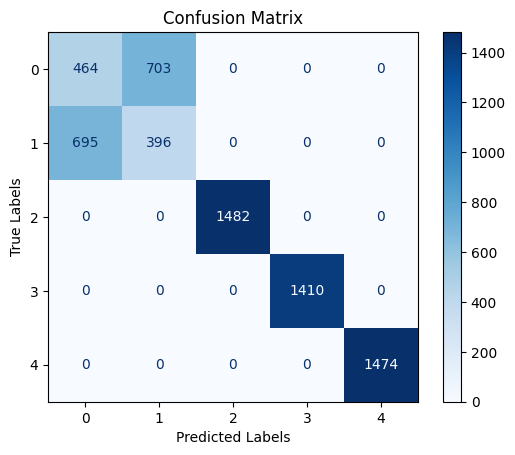

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
ConfusionMatrixDisplay(conf_matrix).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# **Save Model**

In [61]:
filename = 'random_forest_model000.pkl'
joblib.dump(best_model, filename)

['random_forest_model000.pkl']

# **Model Evaluation**

In [62]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.37      0.38      1167
           1       0.36      0.36      0.36      1091
           2       1.00      1.00      1.00      1482
           3       1.00      1.00      1.00      1410
           4       1.00      1.00      1.00      1474

   micro avg       0.79      0.78      0.79      6624
   macro avg       0.75      0.75      0.75      6624
weighted avg       0.79      0.78      0.79      6624
 samples avg       0.78      0.78      0.78      6624



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **Making a Predective System**

In [63]:
# Load the scaler and encoder
scaler = joblib.load('scaler.joblib')  # Replace 'scaler.joblib' with the actual filename
encoder = joblib.load('encoder.joblib')  # Replace 'encoder.joblib' with the actual filename

# Load the trained model
new_model_ = joblib.load('random_forest_model000.pkl')  # Replace with the actual filename

# Define numerical and categorical features
numerical_features = ['Age', 'Temperature']
categorical_features = ['Animal', 'Symptom 1', 'Symptom 2', 'Symptom 3']

# Function to preprocess input data
def preprocess_input(input_data):
    # Separate numerical and categorical features
    numerical_data = input_data[numerical_features]
    categorical_data = input_data[categorical_features]

    # Scale numerical features
    numerical_scaled = scaler.transform(numerical_data)

    # One-hot encode categorical features
    categorical_encoded = encoder.transform(categorical_data)

    # Concatenate numerical and encoded categorical features
    input_features = np.concatenate([numerical_scaled, categorical_encoded], axis=1)

    return input_features

# Example input data (replace this with your actual input)
input_data = pd.DataFrame({
    'Age': [15],
    'Temperature': [102.6],
    'Animal': ['cow'],
    'Symptom 1': ['swelling in limb'],
    'Symptom 2': ['lameness'],
    'Symptom 3': ['depression']
})

# Preprocess input data
preprocessed_input = preprocess_input(input_data)

# Make predictions
predictions = new_model_.predict(preprocessed_input)

# Get predicted class index for each prediction
predicted_classes = np.argmax(predictions, axis=1)

# Load the class labels
class_labels = ['pneumonia', 'lumpy virus', 'blackleg', 'foot and mouth', 'anthrax']  # class labels

# Display predictions with class names
print("Predictions:")
for idx, pred_class in enumerate(predicted_classes):
    label = class_labels[pred_class]
    percentage = predictions[idx, pred_class] * 100
    print(f"{label}: {percentage:.4f}%")

Predictions:
blackleg: 100.0000%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
